In [1]:
import pandas as pd
trans=pd.read_csv(r'F:\Lessons\lesson5\transaction_data.csv', sep=',', parse_dates=['date'])
trans.describe

<bound method NDFrame.describe of                     date                name  transaction
0    2020-03-02 00:37:20   Ekaterina_Petrova    cancelled
1    2020-03-02 00:59:09      Irina_Fedorova  successfull
2    2020-03-02 01:06:14  Ekaterina_Smirnova  successfull
3    2020-03-02 00:02:58    Lolita_Polyanova    cancelled
4    2020-03-02 00:17:52      Julia_Smirnova    cancelled
...                  ...                 ...          ...
5310 2020-03-02 00:09:28   Vasilisa_Fedorova  successfull
5311 2020-03-02 00:46:31    Vasilisa_Ozerova  successfull
5312 2020-03-02 00:16:38      Olga_Polyanova  successfull
5313 2020-03-02 00:13:00  Ekaterina_Smirnova  successfull
5314 2020-03-02 01:15:45      Irina_Fedorova    cancelled

[5315 rows x 3 columns]>

In [13]:
trans.shape

(5315, 3)

In [14]:
trans.head(3)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull


In [19]:
trans.isnull().sum(axis=0) #колличество незаполненых полей

date           0
name           0
transaction    0
dtype: int64

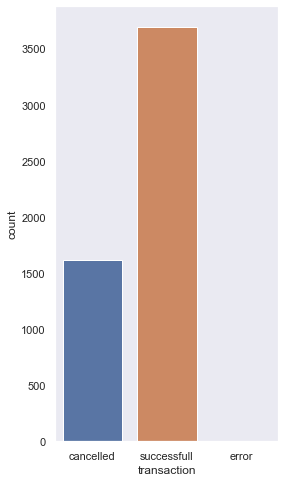

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,8 )) #масштабирую
sns.set_theme(style="dark")
ax = sns.countplot(x="transaction", data=trans)

In [22]:
trans.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [29]:
trans.groupby('transaction').count()

,date,name
transaction,,
cancelled,1619,1619
error,4,4
successfull,3692,3692


In [80]:
trans_temp=trans.query("transaction=='successfull' ").groupby('name').agg({'transaction':'count'})
trans_temp.mean()

transaction    65.928571
dtype: float64

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


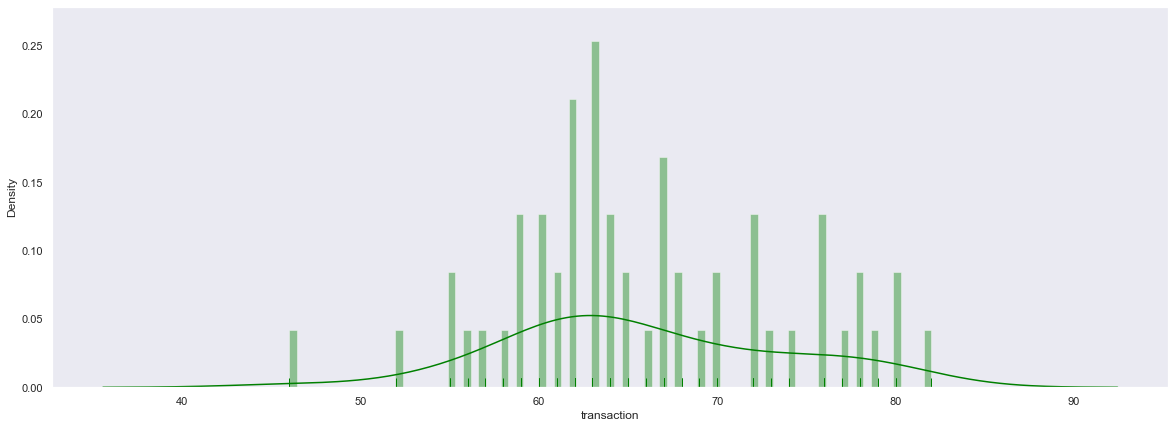

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,7 )) #масштабирую
sns.despine() 
ax = sns.distplot(trans_temp['transaction'], bins=85, rug=True, color='green', norm_hist=True)


In [1]:
import pandas as pd
trans_updt=pd.read_csv(r'F:\Lessons\lesson5\transaction_data_updated.csv', sep=',', parse_dates=['date'])
trans_updt.head(4)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2


In [2]:
user_vs=trans_updt.groupby(["name", "minute"], as_index=False).agg({"transaction":'count'})\
                .pivot(index='minute', columns='name', values='transaction')\
                .fillna(0)\
                .reset_index(drop=True)
user_vs.head(2)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
